# CHEM 1000 - Spring 2023
Prof. Geoffrey Hutchison, University of Pittsburgh
Ryan Wheat, University of Pittsburgh

## Recitation

For this recitation, we'll focus on:
- Numerical Optimization using Sympy
- Numerical Optimization using Scipy
---

The goal of Chapter 6 is to give a cursory overview of the vastly expanding field that is "optimization algorithms." Whether we're aware of it or not, optimization is an important concept all around us.

This recitation is focused not on analytical optimization (e.g., in which we can solve for gradients and second (partial) derivatives), but for numeric optimization in which the functional form is either too complicated or unknown to solve analytically.

### Part A: Ackley Function

Sometimes determining the analytical solution to a function is not practical. In this case, one might wish to better understand the function graphically to then interpolate the extrema numerically, or to evaluate complicated Sympy expressions as floating point numbers.

The Ackley function is used to test optimization methods. (There's actually a whole zoo of weird [multidimensional functions to test optimization methods](https://en.wikipedia.org/wiki/Test_functions_for_optimization).)

$$
\begin{aligned}
& f(x, y)=-20 \exp \left[-0.2 \sqrt{0.5\left(x^2+y^2\right)}\right] \\
& -\exp [0.5(\cos 2 \pi x+\cos 2 \pi y)]+e+20 \\
&
\end{aligned}
$$

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.11.1 (Python 3.9.16-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



In [2]:
# Let's try using sympy

f = -20*exp( -0.2*sqrt( 0.5 * (x**2 + y**2)) ) - exp(0.5*(cos(2*pi*x) + cos(2*pi*y))) + exp(1) + 20

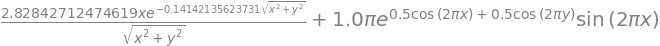

In [3]:
# show me the partial derivative for x
dfdx = diff(f, x)
dfdx

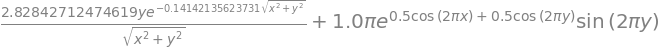

In [5]:
# similar for partial derivative for y
dfdy = diff(f, y)
dfdy

In [ ]:
# this might run forever!
eq1 = Eq(dfdx, 0)
eq2 = Eq(dfdy, 0)
solve([eq1,eq2],(x,y))

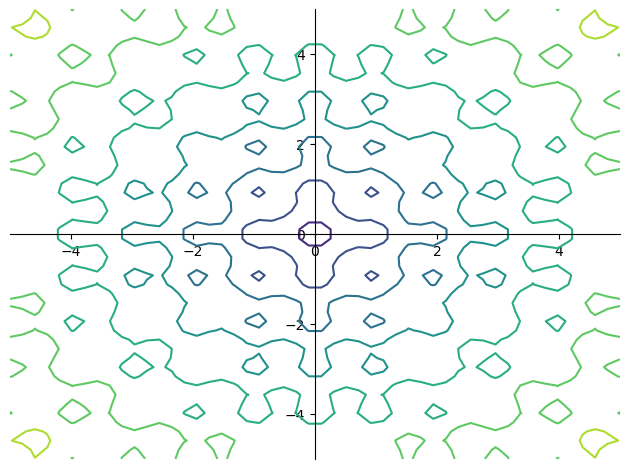

In [6]:
# okay, let's plot the function
# sympy offers a contour plot function

from sympy.plotting.plot import plot_contour
%matplotlib inline

plot_contour(f, (x, -5, 5), (y, -5, 5))

It looks like the minimum is at the origin. (Spoiler: It is.)

We can test this in a few ways.

In Sympy, we can use `.subs` to substitute values for variables:

In [10]:
# substitute x with 0.0
# .. feel free to try other values (e.g., 1.0, pi, etc.)
dfdx.subs(x, 0.0)

In [11]:
# substitute y with 0.0
dfdy.subs(y, 0)

So we know that at (0,0) the gradient is zero. Is it a minima or a maxima?

In [12]:
f.subs([ (x,0), (y, 0)])

I'm pretty sure that's zero, but let's force Sympy to evaluate it.

In [13]:
N( f.subs([ (x,0), (y, 0)]) )

In [14]:
f.subs([ (x,0), (y, 0)]).evalf()

Close enough. We can try a few other points to convince ourselves that it's an actual minima.

So as a reminder:
- We can use `.subs( variable, value)` to substitute one variable for a number
- We can use `.subs( [ list of (variable, value), (variable2, value2) ] )` to substitute a bunch of variables
- We can use `N()` or `.evalf()` to force Sympy to give a number like a calculator

**What if there are multiple solutions?**

Sympy will give multiple solutions as a list. We know how to handle lists in Python, e.g.

`list[0]` gives the first item in the list
`len(list)` gives the length of a list

That also works with Sympy, e.g.:

`N(solution[0])` or `solution[0].evalf()` give the numeric result from a list of solutions

### Part B: Numeric Optimization

So what if you're out of luck, either because Sympy is just failing .. or you need to do numeric optimization?

Fortunately, `scipy.optimize` has a `minimize` function that handles common optimization cases. We just need to code a Python function.

In [15]:
import numpy as np
from scipy.optimize import minimize

In [22]:
# notice that I'm using np.exp to use the numeric versions, not the Sympy versions
def ackley(values):
    # the parameters will be given as a list, so assign them to variables
    x = values[0]
    y = values[1]
    return -20.0*np.exp(-0.2*np.sqrt(0.5*(x**2 + y**2))) - np.exp(0.5*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y))) + np.exp(1) + 20

In [24]:
ackley([0,0])

Okay, now that we have our function to optimize, we need to pick an initial value and call `minimize()`

In [26]:
initial = np.array([0.1, 0.1])
optima = minimize(ackley, initial)
print(optima)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 2.878979543652349e-08
        x: [-7.196e-09 -7.199e-09]
      nit: 9
      jac: [ 6.945e-02  6.876e-02]
 hess_inv: [[ 3.970e-09  1.315e-10]
            [ 1.315e-10  3.971e-09]]
     nfev: 204
     njev: 64


Okay, that's a bunch to understand:

- `message`: a warning or error message
- `success`: True / False (i.e., did we reach a minimum)
- `fun`: The value of the function at the current point
- `x`: The current point (as a list / array)
- `nit`: The number of iterations (steps) taken
- `nfev`: The number of function evaluations

The default optimizer is `BFGS` which takes multiple steps while estimating the gradient and the Hessian along the way. It's usually a good optimizer for most problems.

Notice that while we started at (0.1, 0.1), the optimizer found its way to (0.0, 0.0) or close enough. It gave up because the gradient and Hessian became really small.

In [28]:
# let's try a different point
optima = minimize(ackley, [3.0, 3.0])
print(optima)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 9.001093478292008
        x: [ 2.979e+00  2.979e+00]
      nit: 3
      jac: [ 3.576e-07  3.576e-07]
 hess_inv: [[ 5.097e-01 -4.903e-01]
            [-4.903e-01  5.097e-01]]
     nfev: 18
     njev: 6


Wait. This is weird. If we start out at (3,3) we don't find our way to the overall minima at (0, 0). This happens because we're stuck in a local minima.

In [29]:
optima = minimize(ackley, [3.5, 3.5])
print(optima)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 9.001093478292015
        x: [ 2.979e+00  2.979e+00]
      nit: 4
      jac: [-2.384e-07 -2.384e-07]
 hess_inv: [[ 5.097e-01 -4.903e-01]
            [-4.903e-01  5.097e-01]]
     nfev: 33
     njev: 11


In [30]:
optima = minimize(ackley, [2.8, 2.8])
print(optima)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 9.001093478292013
        x: [ 2.979e+00  2.979e+00]
      nit: 6
      jac: [-2.384e-07 -2.384e-07]
 hess_inv: [[ 5.097e-01 -4.903e-01]
            [-4.903e-01  5.097e-01]]
     nfev: 27
     njev: 9


Notice that at 2.8 or 3.5 .. anything near (3,3) will converge to the same spot.

This is useful if you want to find multiple minima and you know roughly where they are.

But what about maxima? How do you find maxima?

The easy trick is to define a new function for minimizing that's -1.0 * maxima() and minimize *that* (e.g., you just flip your function and a maxima becomes a minima, etc.)

So the main trick to numeric optimization in Python is to use `scipy.optimize.minimize()` and set up the function you want to minimize using an array of values. Supply an initial value and call `minimize()`.

### Part C: Constrained Optimization (Practice)

Let's say that you are starting a company and need to hire staff and order materials. The materials (m) you need can be ordered in bulk at 50 dollars for each crate. You need to hire staff (s) to convert the materials into some product (think assembly line) at 20 dollars per hour. After consulting an entrepeneur and an engineer, you find that similar companies have used this model:

$$
f(m,s) = 5m^{2}s+2s^{2}m
$$

#### Run the code in each cell and answer the three questions below to get credit for this recitation.

1. Your company has a startup fund of 600 dollars. Optimize your initial spending given the model above.
2. Your friend is also starting a company and has been instructed to use the same model. However, you decided to give your friend two crates of material and to transfer one of your workers to their company to start production. Modify the model with these initial conditions.
3. Your friend has applied for a startup fund and was awarded 480 dollars. Optimize spending to maximize their efficiency.

In [ ]:
# Calculate your optimal spending.

m, s = symbols("m s", real=True)

f = 5*s*m**2 + 2*m*s**2
g = 
l = 

In [ ]:
# Write your new model here...

f_new = 

In [ ]:
# Calculate the optimal spending for your friend.

f_new = 
g = 
l = 